<a href="https://colab.research.google.com/github/ntkhang2003/ML-DL-learning/blob/main/Copy_of_B%C3%A0i_t%E1%BA%ADp_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thuật toán KNN

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

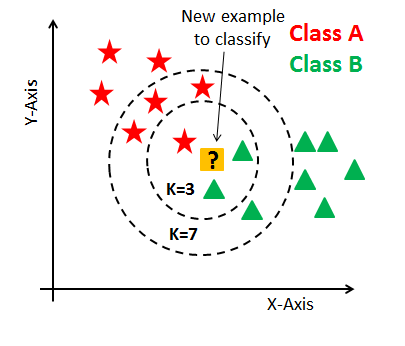



- x_train : kích thước n x d. Với n là số mẫu dữ liệu, và d là số đặc trưng.

In [ ]:
def knn(x_train, x_test, k):
    """
    Finds the k nearest neighbors of x_test in x_train.
    Input:
    x_train = n x d matrix. n=rows and d=features
    x_test = m x d matrix. m=rows and d=features (same amount of features as xTrain)
    k = number of nearest neighbors to be found
    Output:
    dists = distances between x_train/x_test points. Size of n x m
    indices = kxm matrix with indices of yTrain labels
    """
    
    ''' 
    Tính khoảng cách giữa mọi điểm trong tập train với mọi điểm trong tập ta muốn dự đoán
    Như hình minh họa trên thì: Với mỗi điểm dữ liệu trong tập dự đoán, ta sẽ tính khoảng cách giữa 
    nó với mọi điểm trong tập huấn luyện.
    '''
    #### Như vậy ta có distances là 1 ma trận có kích thước m x n

    #### Có các loại công thức tính khoảng cách như
    #### Euclid - là công thức tính quen thuộc : căn bậc 2 của tổng của bình phương các hiệu (d đặc trưng -> d hiệu)
    ####  sqrt  ((a1 - a2) ^2+ (b1 - b2)^2 + (c1 - c2)^2 + ...) 
    #### Code tính khoảng cách tại đây
    distances = np.sum(x_test**2,axis=1) -2 * x_train@x_test.T + np.sum(x_train**2,axis=1)[:, np.newaxis]

    #### sort lại khoảng cách lấy ra vị trí : indices
    indices     = np.argsort(distances, 0)
    distances = np.sort(distances,0)       
    
    #### Chỉ trả về k khoảng cách cao nhất
    return indices[0:k, : ], distances[0:k, : ]

In [ ]:
def knn_predictions(x_train,y_train,x_test,k=3):
    """
    Input:
    x_train = n x d matrix. n=rows and d=features
    y_train = n x 1 array. n=rows with label value
    x_test = m x d matrix. m=rows and d=features
    k = number of nearest neighbors to be found
    Output:
    predictions = predicted labels, ie preds(i) is the predicted label of x_test(i,:)
    """
    indices, distances = knn(x_train,x_test,k)
    yTrain = y_train.flatten()
    rows, columns = indices.shape
    predictions = list()
    for j in range(columns):
        temp = list()
        for i in range(rows):
            cell = indices[i][j]
            temp.append(y_train[cell])
        predictions.append(max(temp,key=temp.count)) 
    predictions=np.array(predictions)
    return predictions

In [ ]:
iris_data = datasets.load_iris()

In [ ]:
X = iris_data.data
y = iris_data.target
X.shape,y.shape

((150, 4), (150,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt 

#### will first check which is the best k
#### k là một hyperparameter nên việc lựa chọn k thế nào cho tốt nhất ta không biết
#### Vì vậy ta cần dò thử k để chọn ra giá trị tốt nhất

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc     = np.zeros((Ks-1))

for n in range(1,Ks):    

    y_pred = knn_predictions(x_train,y_train,x_test,n)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)    
    std_acc[n-1]=np.std(y_pred == y_test)/np.sqrt(y_pred.shape[0])


In [ ]:
print( "The best accuracy was:", np.round(mean_acc.max()*100,2), "% with k=", mean_acc.argmax()+1) 

The best accuracy was: 97.78 % with k= 3
